# Testing the likelihood external file

To start playing with this notebook, install ```COBAYA``` and its modules according to README

In [5]:
#General imports
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Import cobaya -need to be installed
import cobaya

### Step 1: create your dictionary with general specifications

In ```COBAYA```, 'ini files' are 'yaml files', which are in reality understood by Cobaya as python dictionaries. I have added comments explaining each of the lines of the dictionary.


In [7]:
#ATTENTION: CHANGE THIS TO YOUR LOCAL PATH where your external codes are installed: CAMB, polychord, likelihoods...
modules_path = "/cosma7/data/dp016/dc-joud1/euclidlikelihoodgit/likelihood-implementation/"

# Info is the 'ini file' dictionary
info = {
    #Which parameters would you like to sample?
    'params': {
        # Fixed
        'ombh2': 0.022, 'omch2': 0.12, 'H0': 68, 'tau': 0.07,
        'mnu': 0.06, 'nnu': 3.046, 'num_massive_neutrinos': 1,
        'ns': 0.9674,
#        'As':3e-9},
        # Sampled - just as an example we assume we will be sampling over A_s
        'As': {'prior': {'min': 1e-9, 'max': 4e-9}, 'latex': 'A_\mathrm{s}'}},
    #Which theory code you want to use? HERE CAMB
    'theory': {'camb': {'stop_at_error': True}},
    #Which sample do you want to use? HERE I use MCMC for testing
    'sampler': {'mcmc': None},  
    #Where have you installed your modules (i.e: CAMB, polychord, likelihoods...)
    'modules': modules_path,
    #Where are the results going to be stored?
    'output': 'chains/my_euclid_experiment',
    #Likelihood: we load the likelihood as an external function
    'likelihood': {'galaxy_clustering': "import_module('_gc_spec_prototype').gc_spec_like"},
    }

### Step 2: Call the 'model' function of ```COBAYA```

In principle, we could run directly cobaya with the above dictionary and start producing chains. However, for testing purposes, the 'model' function is created, which allows to enter directly to theory code's quantities.

In [8]:
from cobaya.model import get_model
model = get_model(info)

[model] *WARNING* Ignored blocks/options: ['sampler', 'output']
[galaxy_clustering] Initialised external likelihood.
[camb] Importing *local* CAMB from /cosma7/data/dp016/dc-joud1/euclidlikelihoodgit/likelihood-implementation/code/CAMB
[likelihood] The theory code will compute the following products, requested by the likelihoods: ['Pk_interpolator', 'comoving_radial_distance', 'H', 'fsigma8']


In [9]:
As = np.linspace(1e-9, 4e-9, 3)
likes = [model.loglike({'As': A})[0] for A in As]
print(likes)

[17991.7169757793, 44700.54331917728, 71117.74917826006]


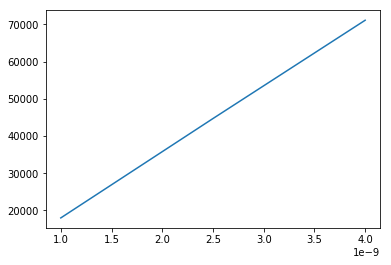

In [10]:
plt.plot(As, likes)
plt.show()
#Return zero because the function gc_spec_like returns zero

In [11]:
print(np.linspace(0.001,2.5,10))

[1.00000000e-03 2.78666667e-01 5.56333333e-01 8.34000000e-01
 1.11166667e+00 1.38933333e+00 1.66700000e+00 1.94466667e+00
 2.22233333e+00 2.50000000e+00]


In [12]:
print(model.likelihood.theory.requested())

{'Pk_interpolator': {'z': array([1.00000000e-03, 2.78666667e-01, 5.56333333e-01, 8.34000000e-01,
       1.11166667e+00, 1.38933333e+00, 1.66700000e+00, 1.94466667e+00,
       2.22233333e+00, 2.50000000e+00]), 'k_max': 0.2, 'vars_pairs': {('delta_tot', 'delta_tot')}, 'extrap_kmax': 2, 'nonlinear': True}, 'comoving_radial_distance': {'z': array([1.00000000e-03, 2.78666667e-01, 5.56333333e-01, 8.34000000e-01,
       1.11166667e+00, 1.38933333e+00, 1.66700000e+00, 1.94466667e+00,
       2.22233333e+00, 2.50000000e+00])}, 'H': {'z': array([1.00000000e-03, 2.78666667e-01, 5.56333333e-01, 8.34000000e-01,
       1.11166667e+00, 1.38933333e+00, 1.66700000e+00, 1.94466667e+00,
       2.22233333e+00, 2.50000000e+00])}, 'fsigma8': {'z': array([1.00000000e-03, 2.78666667e-01, 5.56333333e-01, 8.34000000e-01,
       1.11166667e+00, 1.38933333e+00, 1.66700000e+00, 1.94466667e+00,
       2.22233333e+00, 2.50000000e+00])}}


In [13]:
print(model.likelihood.theory.get_H(np.linspace(0.001,2.5,10)))

[ 68.03150067  78.61488615  92.61002053 109.5477912  128.9811883
 150.55394934 173.99826264 199.11442169 225.7514367  253.79257143]


In [14]:
print(model.likelihood.theory.get_fsigma8(np.linspace(0.001,2.5,10)))

[0.58544624 0.64956753 0.65182393 0.62229892 0.58075871 0.53720404
 0.49592773 0.45843233 0.42498164 0.39533824]


In [15]:
print(model.likelihood.theory.get_comoving_radial_distance(np.linspace(0.001,2.5,10)))

[4.40769204e+00 1.14636792e+03 2.12389960e+03 2.95122411e+03
 3.65186819e+03 4.24934301e+03 4.76367171e+03 5.21087049e+03
 5.60346237e+03 5.95119577e+03]


In [16]:
pkint = model.likelihood.theory.get_Pk_interpolator()

In [17]:
print(pkint["delta_tot_delta_tot"])

<camb.results.CAMBdata.get_matter_power_interpolator.<locals>.PKInterpolator object at 0x2adb417a7f60>
